# 1) Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# 2) Read the data as a data frame 

In [2]:
data=pd.read_csv('insurance.csv')

# 3) EDA

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#shape of the data
print("There are {} rows and {} columns in the dataframe.".format(data.shape[0],data.shape[1]))

There are 1338 rows and 7 columns in the dataframe.


In [5]:
#to find the datatype of each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**There are 7 attributes with 4 Numeric data(age,bmi,children,charges) and 3 Categorical data(smoker,sex,region).**

In [6]:
#To check for missing values
data.isnull().sum().sum()

0

**Observation: There is no null values in the data set(no missing values)**

In [7]:
print("Summary Statistics of  Numerical Attributes")
data.describe()

Summary Statistics of  Numerical Attributes


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Observation:** 
     
     1) The age column shows the age disrtibution of an adult population(18 to 64 years).
     
     2) Most of the people have less than 2 children i.e 75% of the people have less than 2 children.

## Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <a list of 10 Patch objects>)

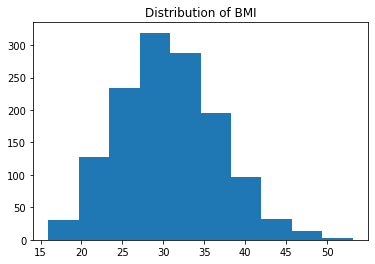

In [8]:
plt.title("Distribution of BMI")
plt.hist(data.bmi)

**Observation: The distribution of BMI seems to be normally  distrubuted.**

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

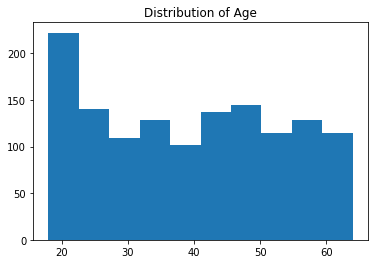

In [9]:
plt.title("Distribution of Age")
plt.hist(data.age)

**Observation: The distribution of age  to be seems to uniformly distrubuted.**

(array([287., 249., 205., 193.,  71.,  58.,  46.,  40.,  25.,  10.,  25.,
         34.,  30.,  27.,  22.,  10.,   1.,   1.,   2.,   2.]),
 array([ 1121.8739   ,  4254.3016055,  7386.729311 , 10519.1570165,
        13651.584722 , 16784.0124275, 19916.440133 , 23048.8678385,
        26181.295544 , 29313.7232495, 32446.150955 , 35578.5786605,
        38711.006366 , 41843.4340715, 44975.861777 , 48108.2894825,
        51240.717188 , 54373.1448935, 57505.572599 , 60638.0003045,
        63770.42801  ]),
 <a list of 20 Patch objects>)

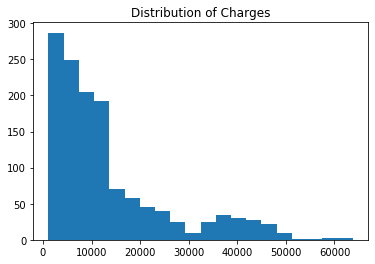

In [10]:
plt.title("Distribution of Charges")
plt.hist(data.charges,bins=20 )


**Observation: The distribution of charges  are highly skewed to the right**

## Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

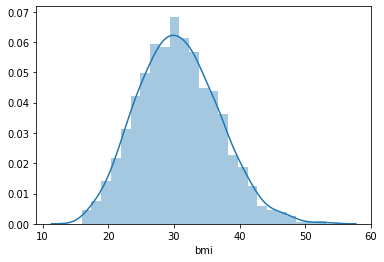

In [11]:
#To vizualize the skewness in bmi
sns.distplot(data.bmi, hist=True)

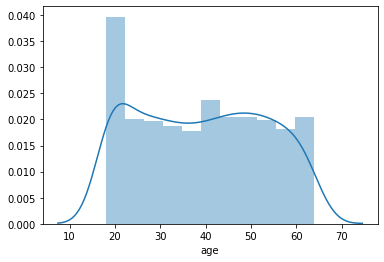

In [12]:
#To vizualize the skewness in age
sns.distplot(data.age)

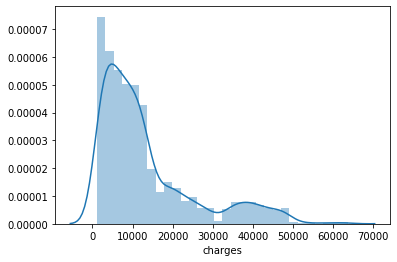

In [13]:
#To vizualize the skewness in charges
sns.distplot(data.charges)

In [14]:
#Measure of skewness in 'bmi', 'age', 'charges'
skew=pd.DataFrame(data[['age', 'bmi', 'charges']].skew(), columns=['Skewness'])

skew

,Skewness
age,0.055673
bmi,0.284047
charges,1.515880


**Observation**

1) We have noted that age is quiet uniformly distributed and can see that its skewness value is very less(very close to 0). 

2) The BMI is fairly symmetrically distributed and we note that its skew value is close to 0.

3) The Charges has a skew value close to +1.5 and hence distribution is heavly skewed to the right. 

## Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns

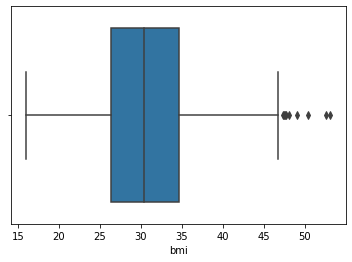

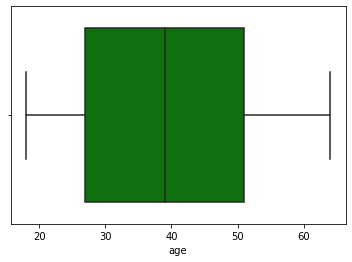

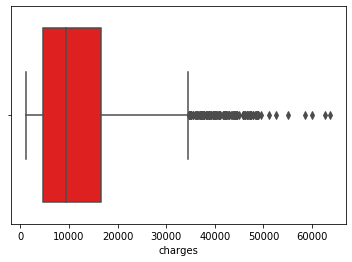

In [15]:
sns.boxplot(x=data.bmi)
plt.show()
sns.boxplot(x=data.age, color='green')
plt.show()
sns.boxplot(x=data.charges, color = 'red')

**Observation:** 
    
    1) BMI has few extreme values.
    2) Age has no outliers.
    3) Charges which is highly skewed to the right has many extreme values. 

## Distribution of categorical columns (include children) 

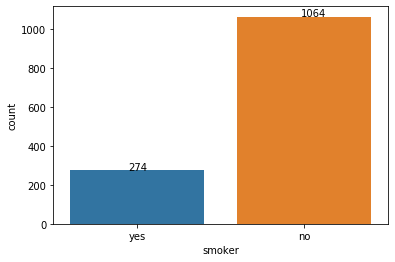

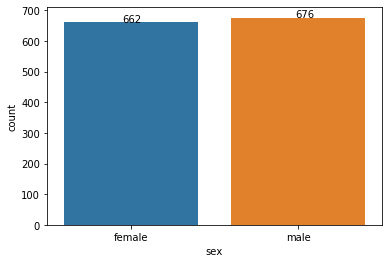

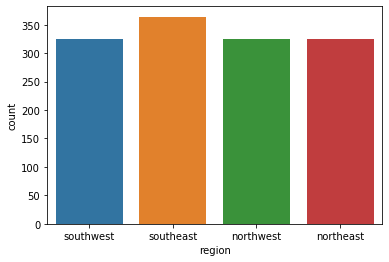

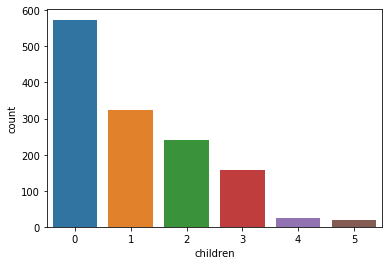

In [16]:
# to compute the distribution of  smoker
sns.countplot(data.smoker)
plt.text(x=-0.05,y=data.smoker.value_counts()[1]+1, s=data.smoker.value_counts()[1])
plt.text(x=0.98,y=data.smoker.value_counts()[0]+2, s=data.smoker.value_counts()[0])
plt.show()

# to compute the distribution of  gender
sns.countplot(data.sex)
plt.text(x=-0.05,y=data.sex.value_counts()[1]+1, s=data.sex.value_counts()[1])
plt.text(x=0.98,y=data.sex.value_counts()[0]+2, s=data.sex.value_counts()[0])
plt.show()

# to compute the distribution of  region
sns.countplot(data.region)
plt.show()

# to compute the distribution of  children column
sns.countplot(data.children)
plt.show()

**Observation:**
    
    1) The number of non-smokers are lot more than that of smokers.
    2) There is not much difference in the number of females and males.
    3) The regions are almost uniformaly distributed.
    4) Very few people only have 4 or 5 children. Also, most people have less than 2 children.

## Encoding Categorical Data

In [17]:
#import label encoder
from sklearn.preprocessing import LabelEncoder

In [18]:
#instantiate the encoder
le= LabelEncoder()


#fit the ecnoder

#for sex
data.sex = le.fit_transform(data.sex) 
integer_mapping_sex = {l: i for i, l in enumerate(le.classes_)}
print(integer_mapping_sex)

#for smoker
data.smoker=le.fit_transform(data.smoker)
mapping_smoker={l:i for i, l in enumerate(le.classes_)}
print(mapping_smoker)

#for region
data.region=le.fit_transform(data.region)
mapping_region={l: i for i, l in enumerate(le.classes_)}
print(mapping_region)

{'female': 0, 'male': 1}
{'no': 0, 'yes': 1}
{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


## Pair plot that includes all the columns 

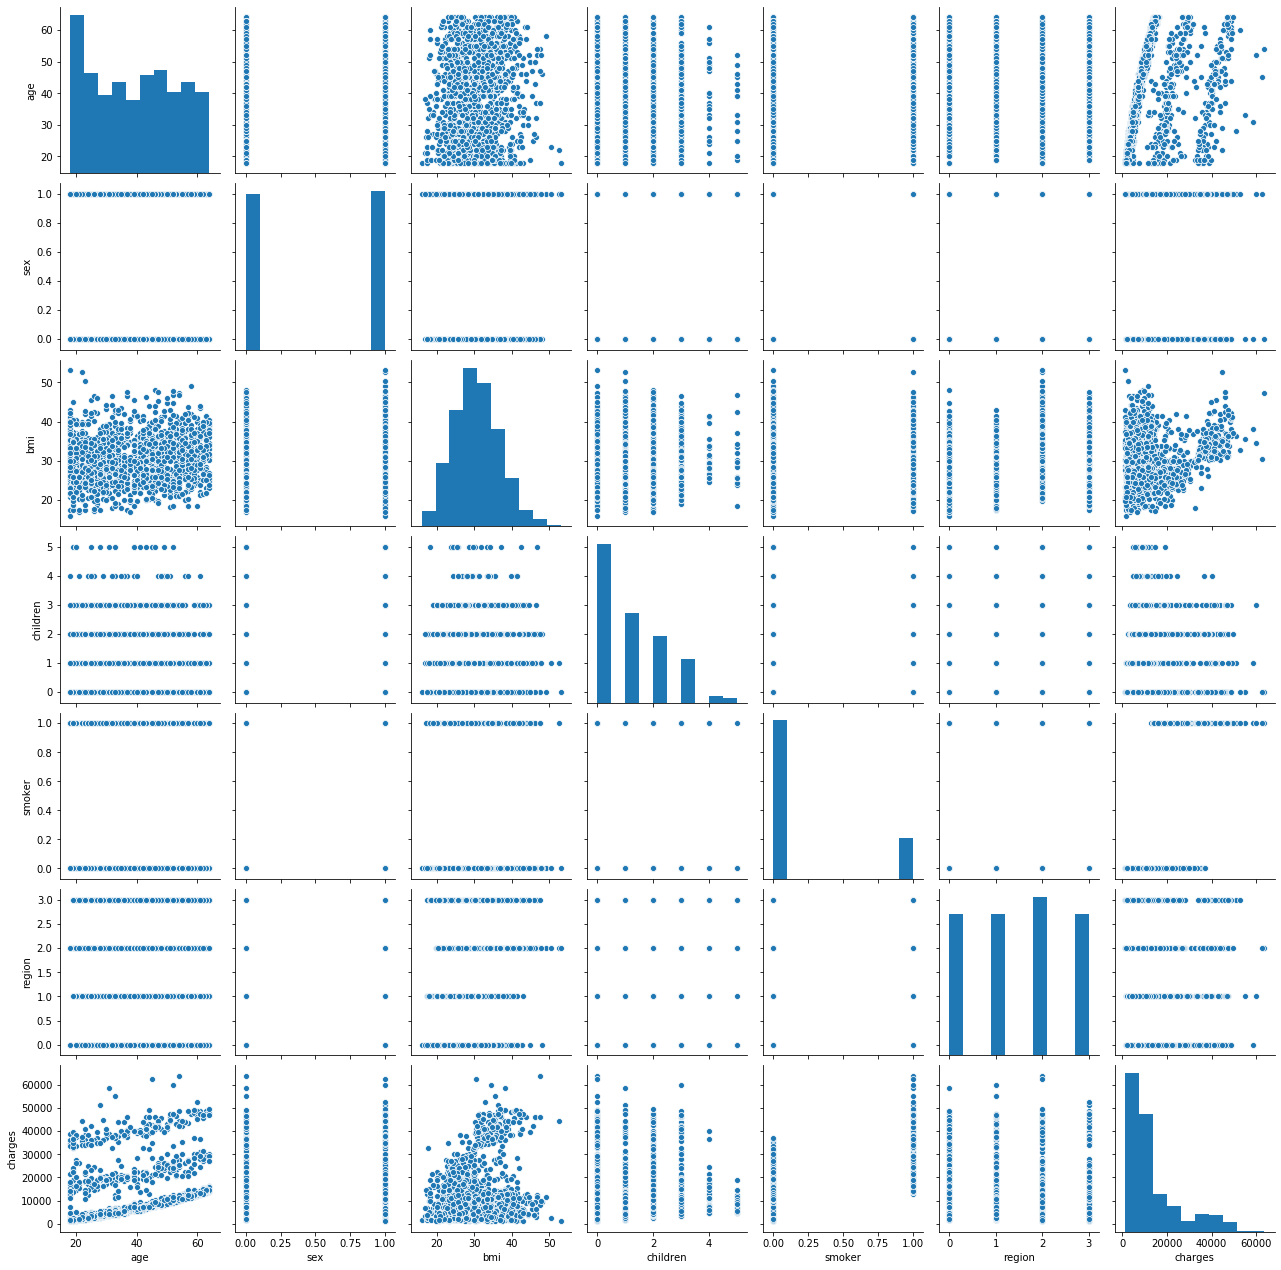

In [19]:
sns.pairplot(data)

In [20]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


**Observation:**

  1) There is positive correlation of 0.787 between charges and smoker.
    
  2) Also, from the pair plot, we can visually see that the charges for smokers is higher than that of non-smokers.
  
  3) Any other 2 variables(except charges and smoker) show no correlation between them.

## Do charges of people who smoke differ significantly from the people who don't?

In [21]:
# Ho: The charges for people who smoke and not smoke are same  #Null Hypothesis
# Ha: The charges for people who smoke and not smoke are different   #Alternate Hypothesis


# We should test for two independent samples i.e. same variables with two different groups
# So, we calculate Independent t-test(2 sample t-test)
# This is a two-sided test and assumes that the 2 groups have the same variance

x=np.array(data[data['smoker']==1]['charges']) #an array of charges representing smokers

y=np.array(data[data['smoker']==0].charges) #an array of charges representing non-smokers

# two sample t-test( or independent t-test)
t_statistics, p_value= stats.ttest_ind(x,y)

print("The p-value is", p_value)

if p_value < 0.05: #significance level at 5%
    print("The charges for people who smoke and not smoke are different.")
else:
    print("The charges for people who smoke and not smoke are same.")

The p-value is 8.271435842177219e-283
The charges for people who smoke and not smoke are different.


**We note that, smokers pay more money than non-smokers.**

## Does bmi of males differ significantly from that of females?

In [22]:
# Ho: Gender has no effect on BMI (The BMI of male and female is same). #Null Hypothesis
# Ha: Gender has effect on BMI (The BMI of male and female is different). #Alternate Hypothesis
    
# We are testing for two independent samples i.e. same variables with two different groups
# So, we calculate Independent t-test
# This  is a two-sided test and assumes that the 2 groups have the same variance

x=np.array(data[data['sex']==0].bmi) #an array with BMI of females
y=np.array(data[data['sex']==1].bmi) #an array with BMI of males

#Compute independent t-test
t_statistics, p_value=stats.ttest_ind(x,y)

print("The p-value is", round(p_value, 3))

if p_value< 0.05: #setting significance level at 0.05
    print("Gender has effect on BMI.")
else:
    print("Gender has no effect on BMI.")

The p-value is 0.09
Gender has no effect on BMI.


**We can say that, the BMI of males are not significantly different from females.**

## Is the proportion of smokers significantly different in different genders?

In [23]:
# Ho: The proportion of smokers is same in different genders #Null Hypothesis
# Ha: The proportion of smokers is different in different genders #Alternate Hypothesis


#To test the relationship between two independent variable we use chi-square test

tab = pd.crosstab(data.sex, data.smoker) #contigency table
tab.rename(columns={0:'No', 1:'Yes'}, index={0:'female', 1:'male'}, inplace=True)
print(tab)

chi2, p_value, dof, ex=stats.chi2_contingency(tab,correction=False) #chi-square test of the contigency tab

print()
print("Chi-square value is", chi2)
print("The p-valueof the test  is", p_value)
print("The degrees of freedom is", dof)
print("The expected frequencies, based on the marginal sums of the table", ex)

print()
if p_value < 0.05:  #significance level at 5%
    print("The proportion of smokers is significantly different in different genders.")
else:
    print("The proportion of smokers is significantly not different among different genders.")


smoker   No  Yes
sex             
female  547  115
male    517  159

Chi-square value is 7.765921028604452
The p-valueof the test  is 0.005324114164320537
The degrees of freedom is 1
The expected frequencies, based on the marginal sums of the table [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]

The proportion of smokers is significantly different in different genders.


We can conclude that, **'Gender has an effect on smokers!'**

## Is the distribution of bmi across women with no children, one child and two children, the same?

In [24]:
# dataframe  of female across the all columns  with less than 2 children
data_2= data[(data['children']<=2) & (data['sex']==0)]


In [25]:
# Ho: The BMI of women with no children, 1 child, 2 children are the same. #Null Hypothesis
# Ha: The BMI of women with no children, 1 child, 2 children are different. #Alternate Hypothesis

#creating array's of BMI for women with 0,1,2 children resp. 
no_child= data_2[data_2['children']==0].bmi 
one_child=data_2[data_2['children']==1].bmi
two_child=data_2[data_2['children']==2].bmi

#We use one-way ANOVA test
f_value, p_value= stats.f_oneway(no_child,one_child,two_child)
print("The f_value and p_value for this test are", (round(f_value,3)),'and', (round(p_value, 3)))

if p_value< 0.05: #setting significance level at 0.05
    print("The BMI of women with no children, 1 child, and 2 children are different.")
else:
    print("The BMI of women with no children, 1 child, and 2 children are the same.")

The f_value and p_value for this test are 0.334 and 0.716
The BMI of women with no children, 1 child, and 2 children are the same.


In [26]:
# To look for an association between 2 variables namely BMI and woman(with less than 2 children)

# Computing *pearson correlation coefficient* to test for correlation between 2 numeric attributes
x=data_2.bmi
y=data_2.children
r, p_value=stats.pearsonr(x,y)


print("The Pearson’s correlation coefficient between women with less than 2 children and BMI is",round(r, 3))
print("The p_value for this test is", round(p_value,3))

The Pearson’s correlation coefficient between women with less than 2 children and BMI is 0.011
The p_value for this test is 0.794


**It is seen that, p_value > 0.05(significance level) hence we fail to reject the null hypothesis.**

**So, we can conclude that, there is no correlation between the 2 variables. And women with less than 2 children have no effect on BMI.**

                                          ********************************